In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import albumentations as A
import models
import dataloaders
import json
from train import get_instance
from utils.metrics import evaluate_dataloader
from utils.helpers import plot_inference

In [3]:
config_path = '../configs/upernet_cross_pretrain.json'
model_path = '/mnt/1058CF1419A58A26/saved/UperNet/12-02_10-46/best_model.pth'

In [4]:
config = json.load(open(config_path))
print(config)

dataloader_val = get_instance(dataloaders, 'val_loader', config)
dataloader_test = get_instance(dataloaders, 'test_loader', config)

{'name': 'UperNet', 'n_gpu': 1, 'use_synch_bn': False, 'arch': {'type': 'UperNet', 'args': {'pretrained': True, 'backbone': 'resnet50', 'freeze_bn': False, 'freeze_backbone': False}}, 'train_loader': {'type': 'Bonn2016', 'args': {'data_dir': '/home/gustavu92/Desktop/trabalho-MO434/data/', 'batch_size': 4, 'base_size': 512, 'augment': True, 'shuffle': False, 'scale': False, 'flip': False, 'rotate': False, 'blur': False, 'split': 'train', 'num_workers': 4}}, 'val_loader': {'type': 'Bonn2016', 'args': {'data_dir': '/home/gustavu92/Desktop/trabalho-MO434/data/', 'batch_size': 4, 'base_size': 512, 'augment': True, 'shuffle': False, 'scale': False, 'flip': False, 'rotate': False, 'blur': False, 'val': True, 'split': 'val', 'num_workers': 4}}, 'test_loader': {'type': 'Bonn2016', 'args': {'data_dir': '/home/gustavu92/Desktop/trabalho-MO434/data/', 'batch_size': 4, 'base_size': 512, 'augment': True, 'shuffle': False, 'scale': False, 'flip': False, 'rotate': False, 'blur': False, 'val': True, 's

In [5]:
loader = getattr(dataloaders, config['train_loader']['type'])(**config['train_loader']['args'])
num_classes = loader.dataset.num_classes

# Model
model = getattr(models, config['arch']['type'])(num_classes, **config['arch']['args'])
availble_gpus = list(range(torch.cuda.device_count()))
device = torch.device('cuda:0' if len(availble_gpus) > 0 else 'cpu')

checkpoint = torch.load(model_path)
if isinstance(checkpoint, dict) and 'state_dict' in checkpoint.keys():
    checkpoint = checkpoint['state_dict']
if 'module' in list(checkpoint.keys())[0] and not isinstance(model, torch.nn.DataParallel):
    model = torch.nn.DataParallel(model)
model.load_state_dict(checkpoint)
model.to(device)
model.eval()

{'root': '/home/gustavu92/Desktop/trabalho-MO434/data/', 'split': 'train', 'mean': [0.5, 0.5, 0.5], 'std': [0.5, 0.5, 0.5], 'augment': True, 'crop_size': None, 'base_size': 512, 'scale': False, 'flip': False, 'blur': False, 'rotate': False, 'return_id': False, 'val': False}


DataParallel(
  (module): UperNet(
    (backbone): ResNet(
      (initial): Sequential(
        (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
        (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      )
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

/home/gustavu92/.local/lib/python3.6/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


(Soil) Accuracy: 0.996, Precision: 0.997, Recall: 0.999, F1: 0.998
(Crop) Accuracy: 0.997, Precision: 0.921, Recall: 0.870, F1: 0.889
(Weed) Accuracy: 0.998, Precision: 0.677, Recall: 0.413, F1: 0.484
FPS: 23


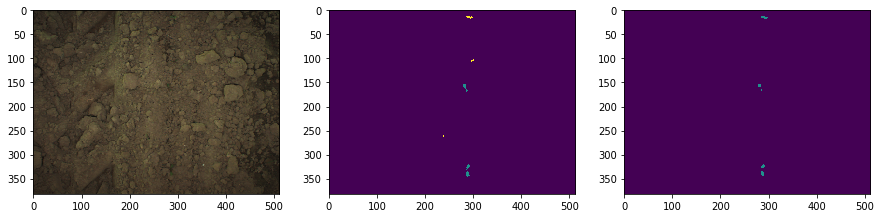

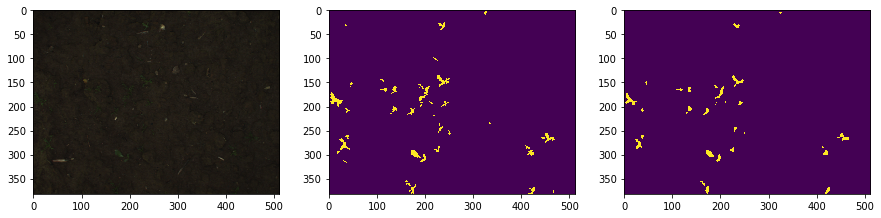

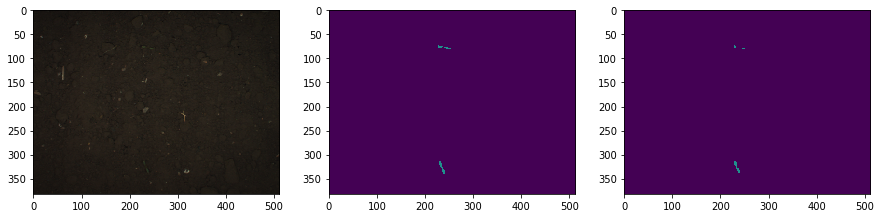

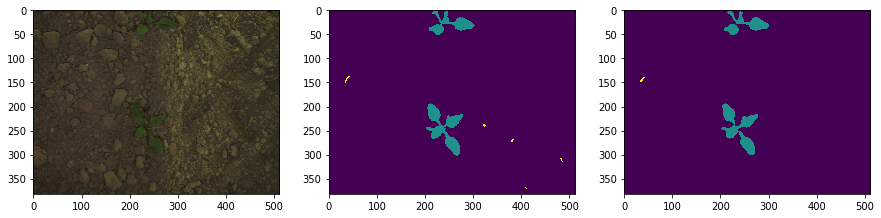

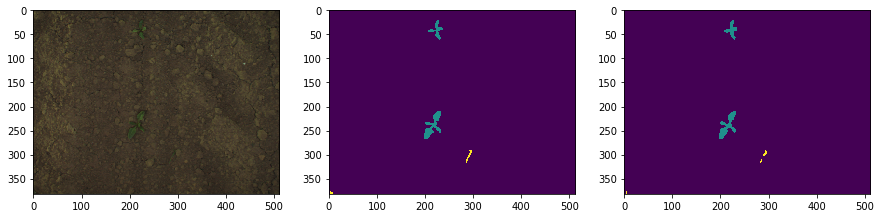

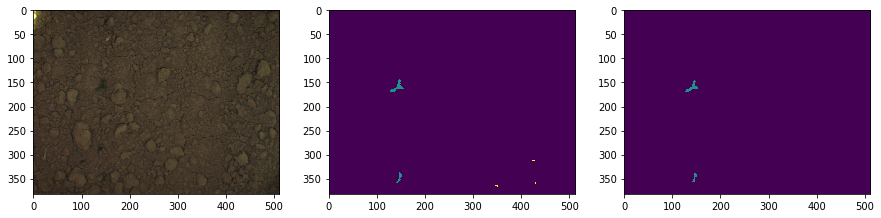

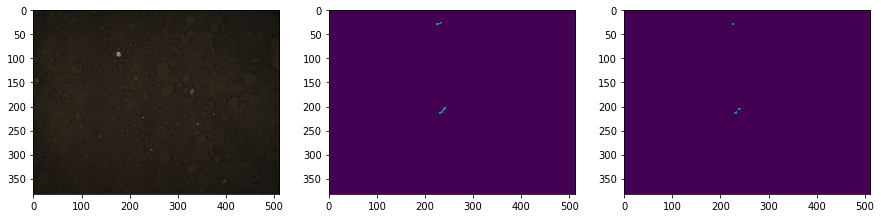

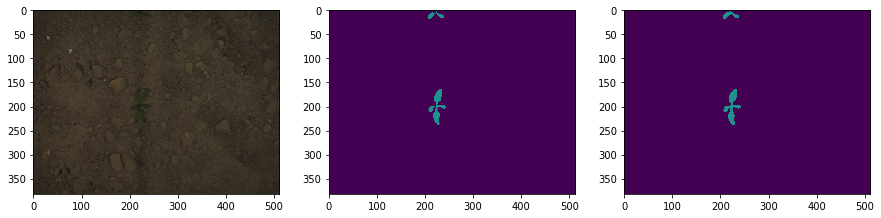

In [6]:
evaluate_dataloader(model, dataloader_val)
plot_inference(model, dataloader_val, batches=1)

(Soil) Accuracy: 0.996, Precision: 0.997, Recall: 0.999, F1: 0.998
(Crop) Accuracy: 0.997, Precision: 0.917, Recall: 0.874, F1: 0.890
(Weed) Accuracy: 0.998, Precision: 0.687, Recall: 0.423, F1: 0.492
FPS: 25


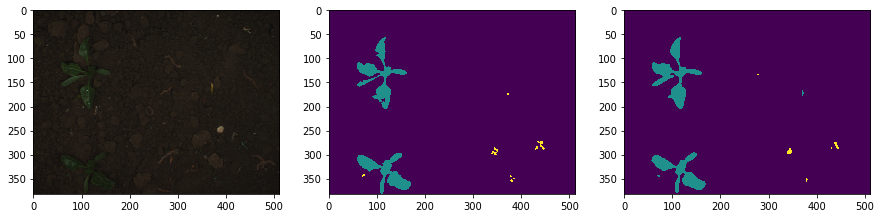

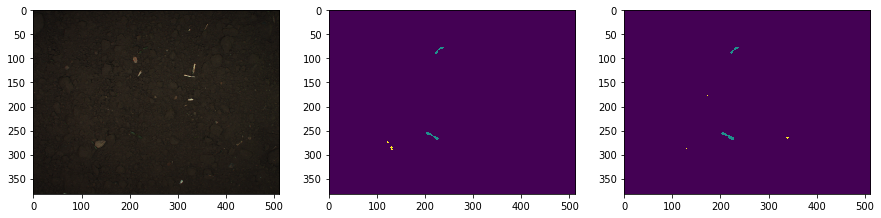

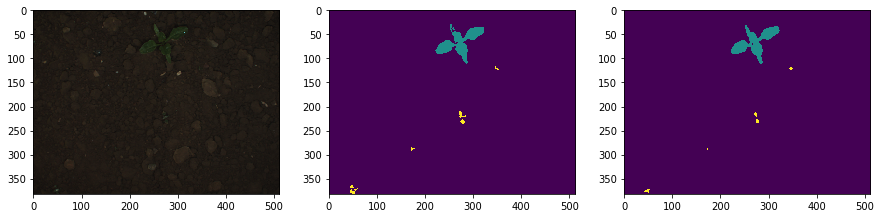

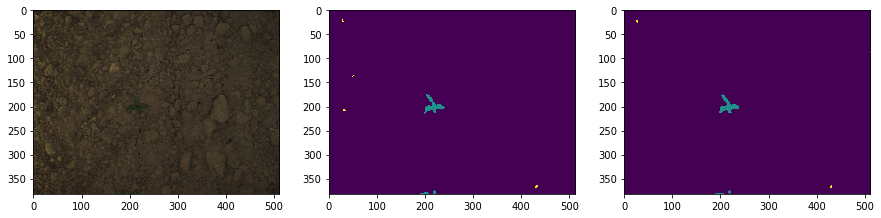

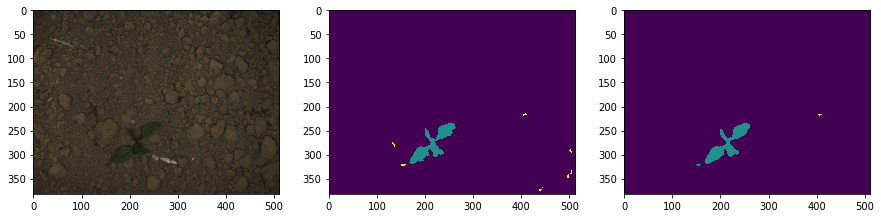

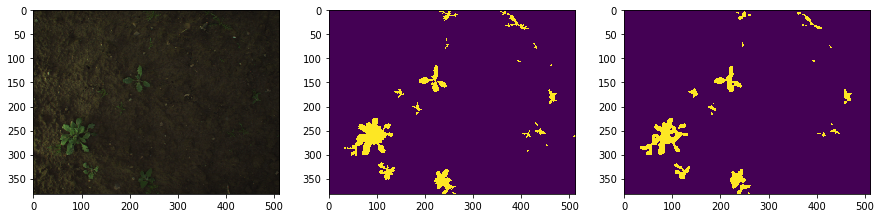

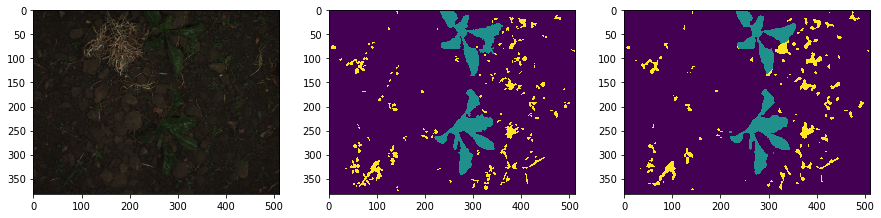

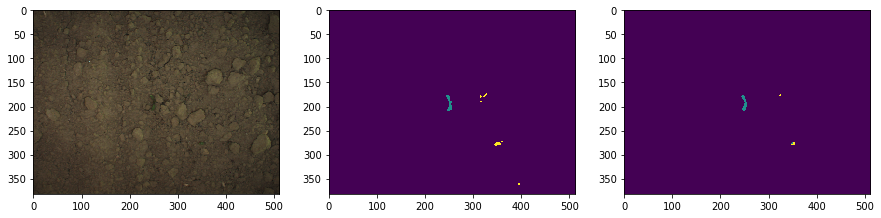

In [7]:
evaluate_dataloader(model, dataloader_test)
plot_inference(model, dataloader_test, batches=1)